<a href="https://colab.research.google.com/github/Natali-PP/diplodatos2021/blob/main/AnalisiYVisualizacion/02_Estadistica_descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Estadística Descriptiva


In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Estadística descriptiva

Hemos estado organizando y visualizando los datos de distintas maneras, pero ¿qué intuiciones podemos obtener?

Las visualizaciones como histogramas o gráficos de conteo muestran la cantidad de veces que se observa cada valor en un conjunto de realizaciones de una variable aleatoria. Esto se denomina análisis de frecuencia, y es parte de la **estadística descriptiva**.

El uso de visualizaciones nos limita a estimaciones, pero los datos crudos son demasiado como para intepretarlos en conjunto. Para eso, la estadística descriptiva provee también medidas de tendencia central y de dispersión, que resumen en un valor numérico propiedades de las realizaciones de la variable.

Retomemos el problema original con la v.a. `salary_monthly_NETO`, ¿qué información brindan las siguientes métricas y cómo usarlas?


In [4]:
salary_col='salary_monthly_BRUTO'

In [5]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       6095.00
mean      124058.55
std       122912.35
min            1.00
25%        61595.00
50%        96000.00
75%       145000.00
max      2180000.00
Name: salary_monthly_BRUTO, dtype: object

## Medidas de tendencia central

Cuando se quiere obtener un valor representativo de todas las realizaciones de una v.a., o su centro, se utiliza una *medida de tendencia central*.

Repasando, dada X una v.a y un conjunto de realizaciones $x = \{ x_1, x_2 ... \}$ donde $x_i = X(\omega)$ para algún $\omega \in \Omega$, y $N = |x|$:

* La **media muestral** (aritmética) o promedio se calcula como:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* La **mediana** se calcula:
  1. Ordenar las realizaciones tal que $x_j \leq x_{j+1}$ 
  2. Si la cantidad de datos $N$ es impar, la mediana es el valor central: $median = x_{\lfloor N / 2 \rfloor +1}$
  3. Si la cantidad de datos $N$ es par, la mediana es e promedio de los dos valores centrales: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* La **moda** son los valores con mayor frecuencia, es decir, los que más se repite.


In [6]:
df[salary_col].mean(), df[salary_col].median()

(124058.54962132902, 96000.0)

**¿Por qué las dos medidas son tan distintas?**

Propiedades de la media:
* Se puede interpretar como el *centro de masa* del histograma. Es decir, si el histograma fuera una figura de madera, el punto de equilibrio donde podemos apoyarlo y no se cae es la media.
* Es muy sensible a valores extremos. [Opcional] ¿Por qué? Ver filminas

**¿Se cumple para estos datos?**

In [7]:
max_salaries = [df[salary_col].max(), 10**6, 500000, 400000, 300000, 200000]
central_tendency = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in max_salaries
]
central_tendency

[(2180000.0, 123721.17819855602, 96000.0),
 (1000000, 120723.13043954605, 96000.0),
 (500000, 112145.56938829432, 95000.0),
 (400000, 107991.96966661021, 94000.0),
 (300000, 102223.41686622657, 92000.0),
 (200000, 91461.11102857142, 88000.0)]

Se pueden graficar estos números para lograr una mejor intuición de la magnitud de las diferencias. Además, al mostrar una visualización se pueden incluir más puntos.

Para poder crear gráficos de seaborn con distintos grupos de datos, muchas veces es necesario cambiar el formato del dataframe de wide a long. Ver [este link](https://anvil.works/blog/tidy-data) para más información.

In [8]:
central_tendency_max = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in range(50000, int(df[salary_col].max()), 10**4)
]
central_tendency_max_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary', 'mean', 'median'])\
  .melt(id_vars='max_salary', var_name='metric')

central_tendency_max_df[:3]

,max_salary,metric,value
0,50000,mean,30339.534775
1,60000,mean,37032.451850
2,70000,mean,44179.526605


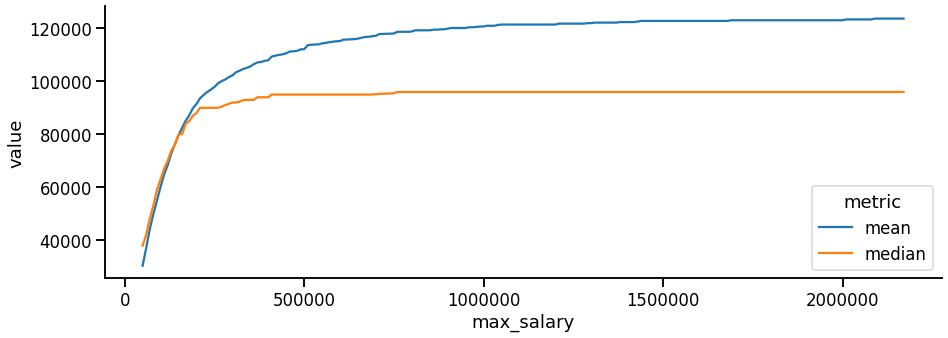

In [9]:
# ¡Podemos ver estos datos visualmente!
fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(data=central_tendency_max_df, x='max_salary', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

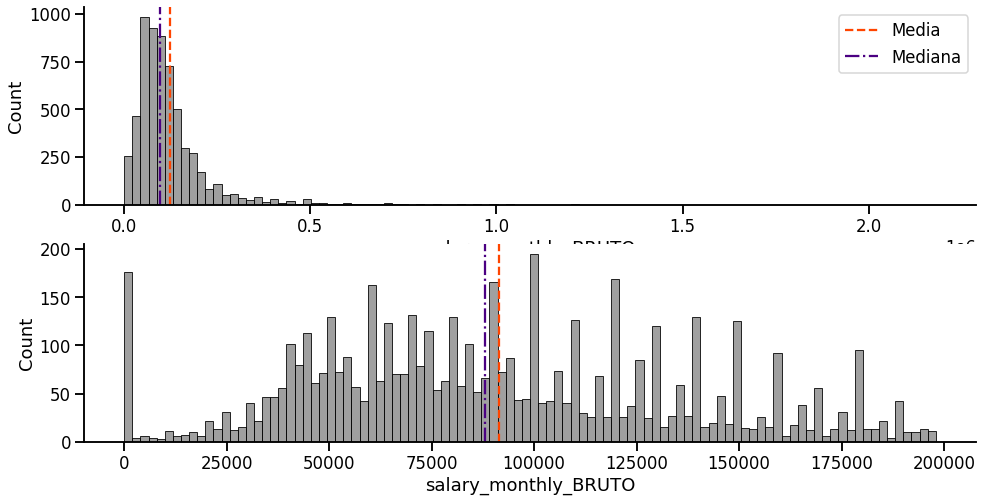

In [10]:
## La diferencia no siempre se aprencia en los gráficos
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000]
seaborn.histplot(filtered_df[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

¿Qué decir de la moda? Sólo que el resultado de la función no es un valor, sino una series de valores, aunque la serie tenga un único elemento.

In [11]:
df.profile_gender.mode()

0    Hombre
dtype: object

## Medidas de dispersión

Las medidas de dispersión vistas en el teórico son la desviación estándar, la varianza, y el coeficiente de variación. También permiten representar con un número alguna propiedad de los datos.

Por ejemplo, comparemos el salario neto con el salario bruto. A priori, **¿deberíamos ver alguna diferencia?**

In [12]:
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].describe().round()

,salary_monthly_NETO,salary_monthly_BRUTO
count,5883.0,6095.0
mean,94908.0,124059.0
std,96862.0,122912.0
min,1.0,1.0
25%,51480.0,61595.0
50%,78000.0,96000.0
75%,106000.0,145000.0
max,2080000.0,2180000.0


Claramente, ambas distribuciones están centradas en valores distintos, pero ¿podemos decir algo sobre su dispersión?

Como estamos hablando de dos v.a. distintas, no podemos comparar directamente los valores de las desviaciones estándar, sino que tenemos que usar el coeficiente de variación.

In [13]:
import scipy

print("Coeficiente de variación salario bruto",
      scipy.stats.variation(df.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto",
      scipy.stats.variation(df.salary_monthly_NETO.dropna()))

Coeficiente de variación salario bruto 0.9906795521353624
Coeficiente de variación salario neto 1.0205048799041485


## Percentiles y gráficos de caja

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una v.a. numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

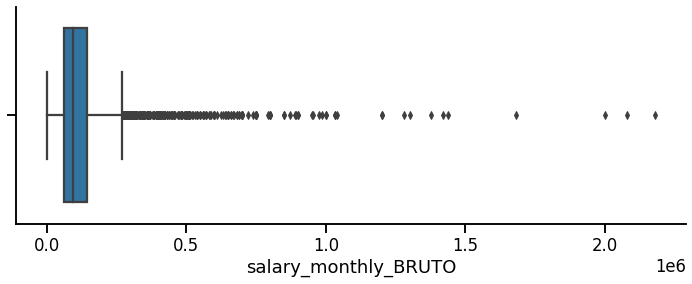

In [14]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

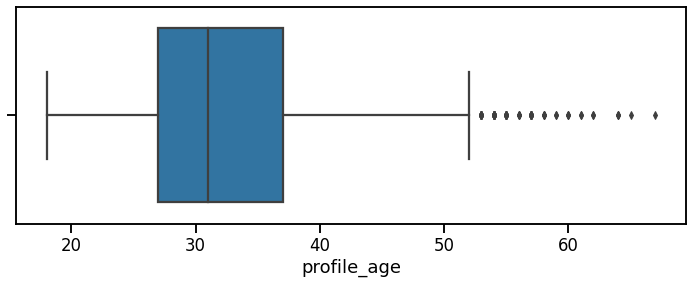

In [15]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[df.profile_age < 100].profile_age)

Por ejemplo, podemos comparar la distribución de los salarios netos con respecto al nivel de estudios alcanzado.

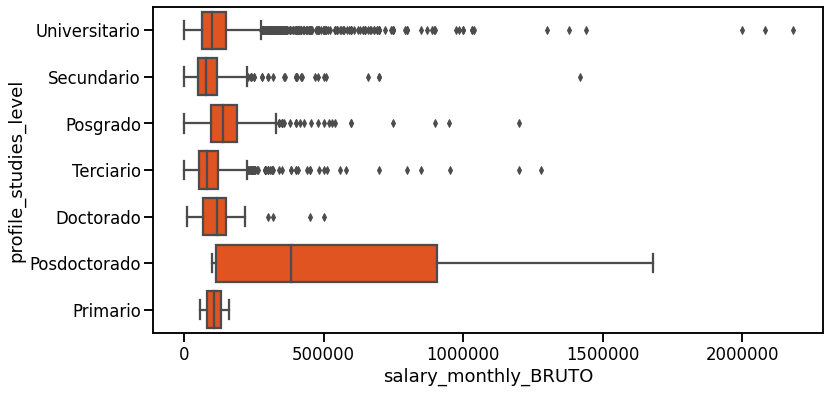

In [16]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

**¿Qué puede estar causando una diferencia tan grande en la distribución para las respuestas que dicen Posdoctorado?**

### Boxenplots

Los boxplots tienen una gran desventaja: ocultan mucha información en la distribución de las colas. Por ejemplo, para la categoría Posdoctorado, sabemos que el 25% de los valores de sueldo neto es mayor que los ~650000 pesos. Pero no conocemos cómo se distribuyen. Para conjuntos de datos de gran tamaño, el 25% de los datos contiene mucha información.

Un gráfico más informativo es el **boxenplot**, que visualiza más percentiles. Otra ventaja es la percepción del mismo debido al peso visual de las cajas: los datos en el rango intercuartílico no parecen muuuucho más importantes que los datos en las colas.

Sin embargo, es aún más difícil de leer si buscamos exactitud, ya que los percentiles que definen el límite de cada caja se definen recursivamente y no decrecen linealmente.

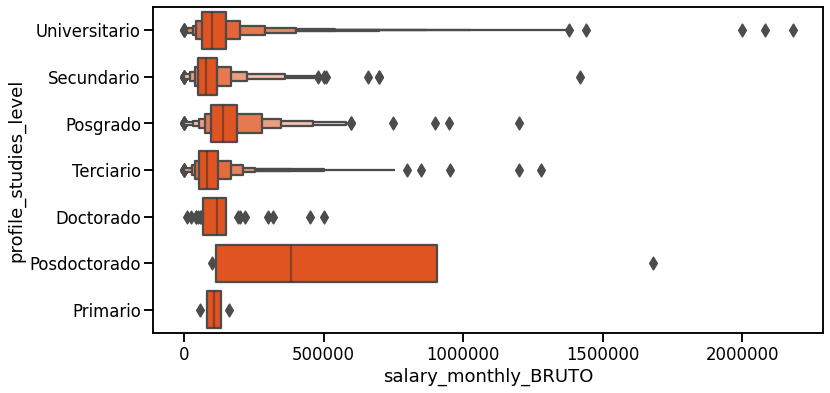

In [17]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

## Eliminación de valores extremos

### Usando percentiles 

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [18]:
df[salary_col].quantile([.95, .98, .99, .995, .998])

0.950     307150.0
0.980     480000.0
0.990     630600.0
0.995     796240.0
0.998    1032671.0
Name: salary_monthly_BRUTO, dtype: float64

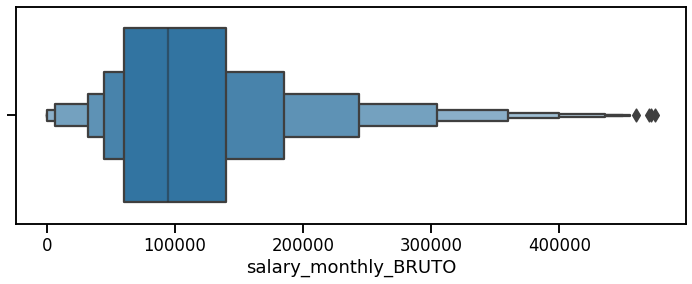

In [19]:
plt.figure(figsize=(12, 4))
max_limit = df[salary_col].quantile(.98)
seaborn.boxenplot(x=df[df[salary_col] < max_limit][salary_col])

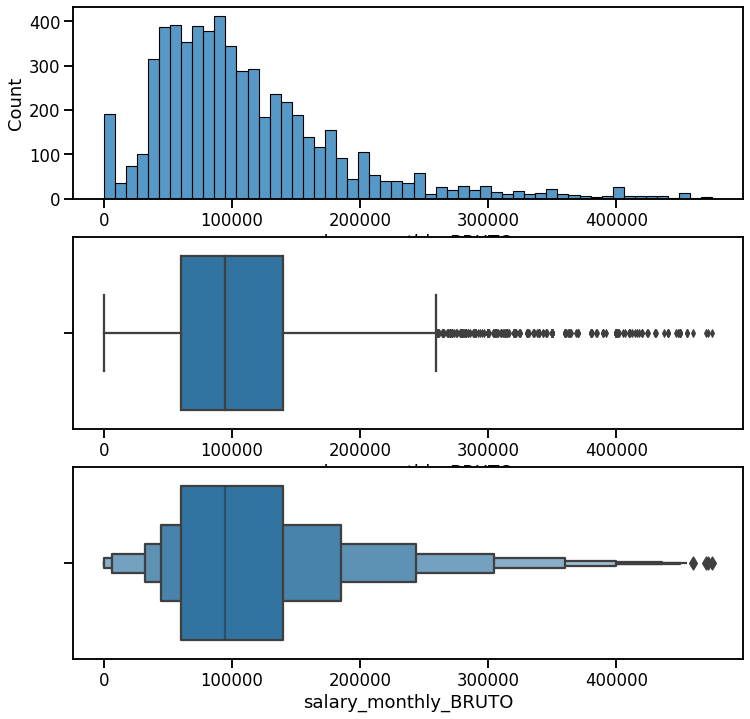

In [20]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = df[df[salary_col] < max_limit][salary_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

### Rango itercuartílico

In [21]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

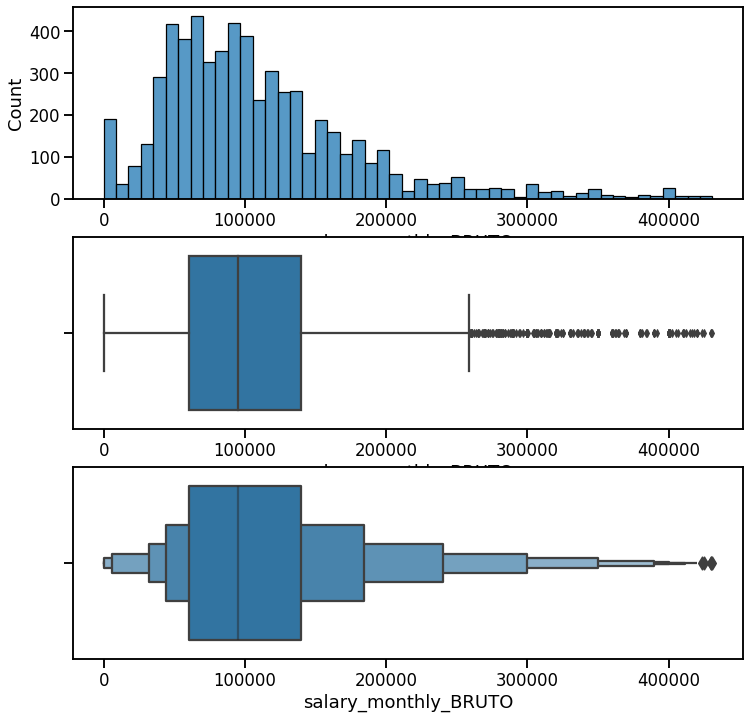

In [22]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = clean_outliers(df, salary_col)[salary_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

### ¡Mirando los datos!

¿Quiénes son los que cobran tanto?

In [23]:
df[df[salary_col] > df[salary_col].quantile(0.98)]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
261,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,21.0,10.0,10.0,17,Universitario,Incompleto,NaN,NaN,No,Sí,Sí,VP / C-Level,"Docker, Firebase, Google Cloud Platform/App En...","Bash/Shell, Go, HTML, Javascript, Perl, PHP, P...","jQuery, Rails, React.js","Google Cloud Storage, MariaDB, MySQL, Percona ...",Ninguna,"Vi, Vim",GNU/Linux,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,800000.0,500000.0,NaN,4,4,3+ sueldos,Mix de las anteriores,Uno,20.0,4,Jamás,Heterosexual,NaN,NaN,5001-10000,Producto basado en Software,9,9,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
318,Hombre,40,Argentina,Santa Fe,4.0,0.0,0.0,0,Posdoctorado,Completado,Licenciatura en Ciencias dela Computación,UNR - Universidad Nacional de Rosario,No,Sí,Sí,Developer,Linux,C++,Ninguno,Ninguna,google test,Vim,GNU/Linux,Android,No,0.0,Neto,Remoto (empresa de otro país),650000.0,422500.0,Mi sueldo está dolarizado,3,4,No,No recibo bono,No,0.0,0,Jamás,¿Qué les importa?,NaN,NaN,1001-2000,Servicios / Consultoría de Software / Digital,8,10,"Capacitaciones y/o cursos, Horarios flexibles,...",NaN
437,Hombre,36,Argentina,Ciudad Autónoma de Buenos Aires,17.0,4.0,4.0,15,Universitario,Incompleto,Ingeniería en Informática,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular",No,No,Manager / Director,Ninguna,Java,Ninguno,PostgreSQL,Ninguna,IntelliJ,macOS,iOS,"Sí, pasiva",0.0,Porcentaje de mi sueldo,Full-Time,540000.0,380000.0,NaN,3,2,Un sueldo,Performance de la compañía,No,0.0,0,En un trabajo anterior,¿Qué les importa?,NaN,No,1001-2000,Producto basado en Software,7,10,"Clases de gimnasia online, Comidas pagas / sub...",NaN
453,Hombre,34,Argentina,GBA,14.0,4.0,2.0,0,Universitario,Completado,Ingeniería en Informática,UM - Universidad de Morón,"Sí, de forma particular",No,No,SysAdmin / DevOps / SRE,"Amazon Web Services, Docker, Kubernetes, Linux...","Bash/Shell, Terraform",Terrafor,"Amazon DynamoDB, Amazon RDS/Aurora, ElasticSea...",Ninguna,"IntelliJ, Vim",macOS,iOS,No,0.0,Bruto,Remoto (empresa de otro país),800000.0,NaN,NaN,4,4,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Oveja,NaN,No,11-50,Servicios / Consultoría de Software / Digital,10,8,Vacaciones flexibles (adicionales a las reglam...,Airbnb
467,Hombre,26,Argentina,Córdoba,6.5,1.5,1.5,0,Universitario,Completado,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Developer,"Amazon Web Services, Docker, Linux","Go, Python, Ruby","Flask, Rails","Amazon DynamoDB, Amazon RDS/Aurora, ElasticSea...",RSpec,"IntelliJ, Visual Studio Code",macOS,iOS,No,0.0,Porcentaje de mi sueldo,Remoto (empresa de otro país),515000.0,NaN,NaN,4,4,No,No recibo bono,No,0.0,0,Jamás,Heterosexual,NaN,No,201-500,Producto basado en Software,10,10,"Horarios flexibles, Vacaciones flexibles (adic...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# **Hipotesis: el nivel de estudio de lxs programadorxs afecta su salario de forma positiva**


In [24]:
len(df)

6095

In [25]:
## df.profile_studies_level.unique()
##education_col = df[df.profile_studies_level != null]
percent_of_null_values = df[
                            ["profile_studies_level", "profile_studies_level_state", "salary_monthly_NETO"]
                            ].isnull().sum() / len(df)*100
## sal_month_neto= df.salary_monthly_NETO / len(df) 
  ##.plot.bar()



## education_dic={ 0: "Primario", 1: "Secundario", 2:"Terciario", 3:"Universitario", 4:"Posgrado"}
percent_of_null_values

profile_studies_level          0.000000
profile_studies_level_state    0.000000
salary_monthly_NETO            3.478261
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


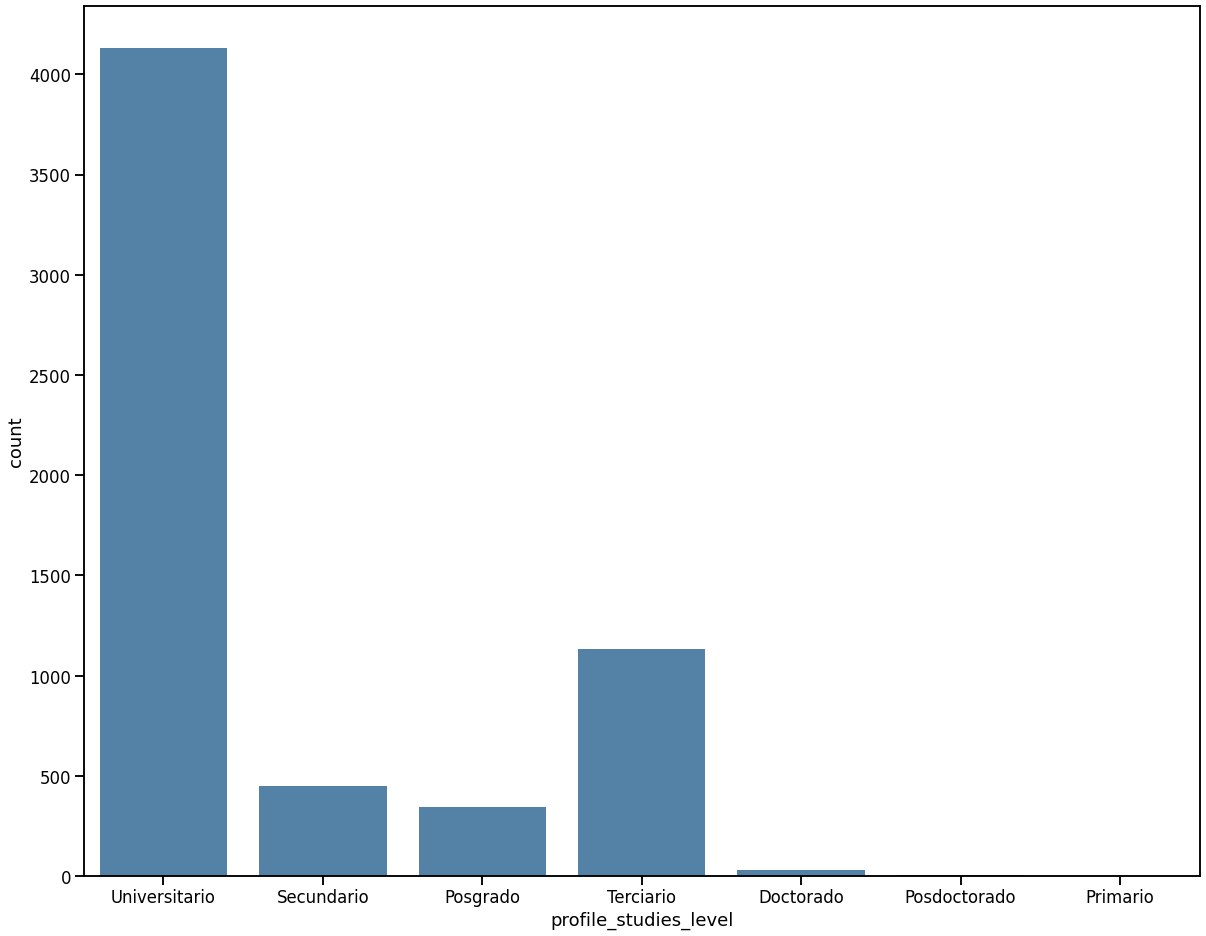

In [26]:
fig = plt.figure(figsize=(20,16))
seaborn.countplot(df.profile_studies_level, color='steelblue')

In [27]:
## salarios nulos son el 3,47%. Por la cantidad se decide sacarlos de la muestra
df_copy= df.copy()
df_copy.drop(df_copy[df_copy.salary_monthly_NETO.isnull()].index, inplace = True)

##df_copy ## df entero sin las filas donde el salario neto isnull

## df_copy.salary_monthly_NETO.isnull().sum() :)





In [28]:
##df_copy.salary_monthly_NETO.quantile([0.01, 0.03, 0.1, 0.2, .95, .98, .99, .995, .998])
##df[df_copy.salary_monthly_NETO > df_copy.salary_monthly_NETO.quantile([0.03])]

## df_copy.salary_monthly_NETO.value_counts()


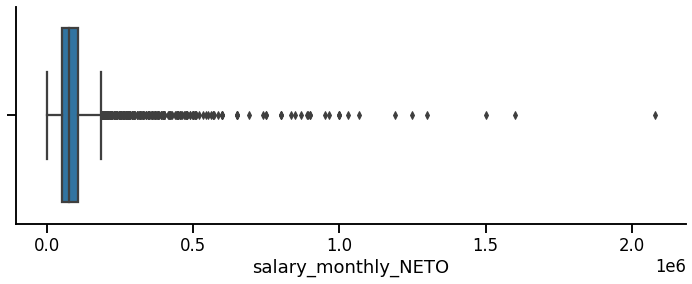

In [29]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df_copy.salary_monthly_NETO)
seaborn.despine()

plantear hipotesis

q variables son --> variable categorica ordinal. 
continua, salario

ver los niveles y si termino su educacion (fino)

outliers?

En variable *"profile_studies_level"* y *"profile_studies_level_state"* no se encontraron valores nulos, pero en la variable *"salary_monthly_NETO"*, si.

distribuciones

probabilidades condicionales e independencia

In [30]:
df_copy.salary_monthly_NETO.mean(), df_copy.salary_monthly_NETO.median()

(94907.9491018188, 78000.0)

In [31]:
quantile_filter= (df_copy.salary_monthly_NETO > df_copy.salary_monthly_NETO.quantile(0.03)) & (df_copy.salary_monthly_NETO < df_copy.salary_monthly_NETO.quantile(0.99))
#df_copy.salary_monthly_NETO, df_copy.salary_monthly_NETO.median()

df_copy=df_copy[quantile_filter]
df_copy.salary_monthly_NETO.mean(), df_copy.salary_monthly_NETO.median(),df_copy.salary_monthly_NETO.mode()

(90912.05981937313, 79000.0, 0    80000.0
 dtype: float64)

La diferencia entre la media y la mediana disminuyo, asique me quede con estos valores.
Al tomar un valor medio me quedo con 84000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


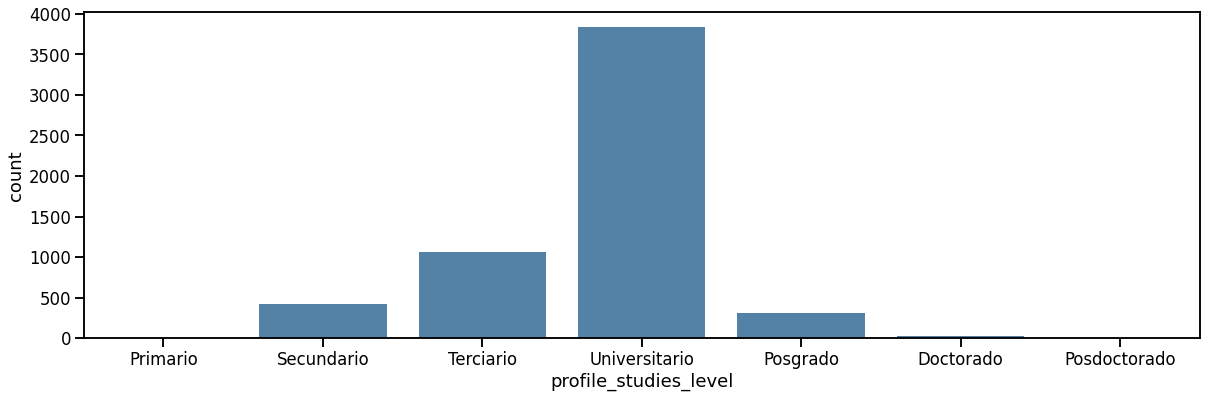

In [32]:
education_order=[ "Primario", "Secundario", "Terciario", "Universitario","Posgrado", "Doctorado", "Posdoctorado"]

fig = plt.figure(figsize=(20,6))
seaborn.countplot(df_copy.profile_studies_level, color='steelblue', order=education_order)

la cantidad de gente que tiene estudios universitarios test filtro

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


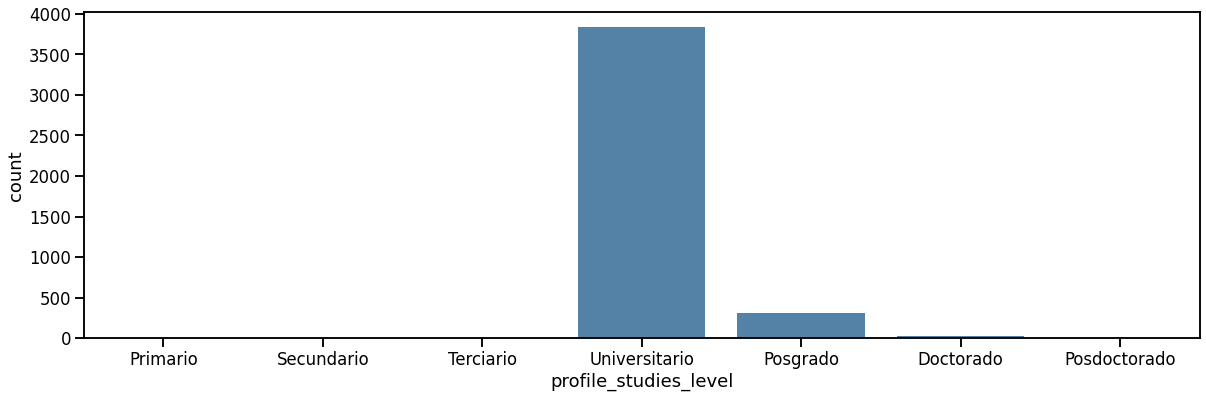

In [33]:
fig = plt.figure(figsize=(20,6))
condition_education = (df_copy.profile_studies_level=="Universitario") | (df_copy.profile_studies_level=="Posgrado")|(df_copy.profile_studies_level=="Doctorado") | (df_copy.profile_studies_level=="Posdoctorado")
##len(df_copy[condition]), len(df_copy)
seaborn.countplot(df_copy[condition_education].profile_studies_level, color='steelblue', order=education_order)


Cantidad de personas que ganan mas que la media, segun educacion alcanzada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


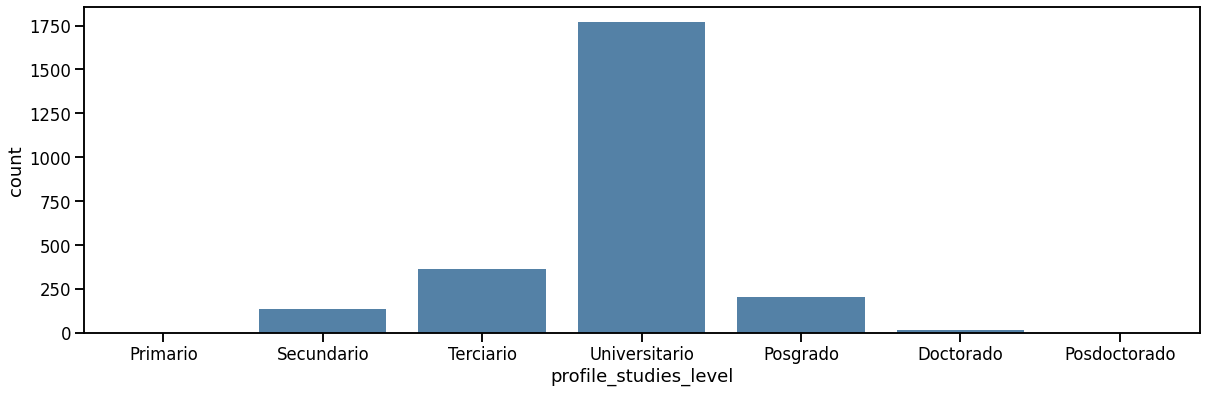

In [34]:
more_then_media=df_copy.salary_monthly_NETO > 84000
fig = plt.figure(figsize=(20,6))
seaborn.countplot(df_copy[more_then_media].profile_studies_level, color='steelblue', order=education_order)

Pero con esto perdemos la nocion de la cantidad total de los datos. Para poder evaluar mejor respecto al conjunto total de datos, uso plots tipo bloxpots donde voy a poder ver las diferentes medias con respecto a las diferentes categorias

---



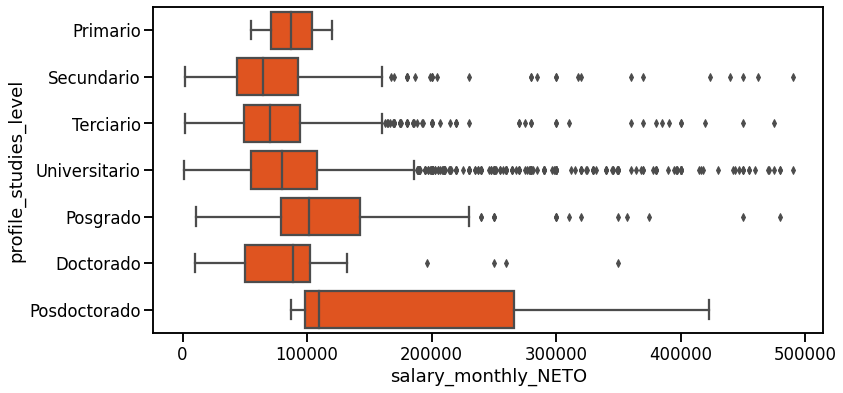

In [35]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df_copy, x='salary_monthly_NETO', y='profile_studies_level',
                color='orangered', order=education_order)
plt.ticklabel_format(style='plain', axis='x')

Vemos que a medida que aumenta el nivel de estudio, los salarios minimos que aparecen en el dataset aumentan, y el valor medio del salario tambien.

Pero me salto la duda, porque hay tanta concentracion de datos en universitario? Porque ese salto en univeritario se ve tan exagerado con respecto a los otros datos?

Anecdoticamente, yo realice esta encuesta, y frente la opcion de colocar si tengo estudios secundarios o universitarios no terminados, elegi la segunda, y supongo que este es un comportamiento que la mayoria haria frente a esta opcion.

La compare con el estado de los estudios

In [36]:
higher_education=["Universitario","Posgrado", "Doctorado", "Posdoctorado"]
#  & (df_copy.profile_studies_level_state=="Completado")
cant_univers_terminado=df_copy[ (df_copy.profile_studies_level.isin(["Universitario"])) & (df_copy.profile_studies_level_state.isin(["Completado"])) ]
cant_univers=df_copy[df_copy.profile_studies_level.isin(["Universitario"])]
cant_univ_no_termin=df_copy[ (df_copy.profile_studies_level.isin(["Universitario"])) & (df_copy.profile_studies_level_state.isin(["Incompleto", "En curso"])) ]
print('cant_univers_terminado ', len(cant_univers_terminado))
print('Cant univers ', len(cant_univers))
print('porcentaje universitario completado ', len(cant_univers_terminado)*100/len(cant_univers))

cant_univers_terminado  1505
Cant univers  3834
porcentaje universitario completado  39.25404277516954


Un 39% de los que contestaron tener estudio universitario completo. Se pueden tomar varias decisiones aqui. Yo decidi separar este grupo en 2, uno con universitario completo y otro universitario incompleto, que incluye el universitario en curso.

In [37]:
#df_copy[["profile_studies_level","profile_studies_level_state"]].sample(50)
#np.where(condition, value if condition is true, value if condition is false)
#df_uni=df_copy.copy()
#complete_uni_condition=(df_uni.profile_studies_level.isin(["Universitario"])) & (df_uni.profile_studies_level_state.isin(["Completado"]))
#df_uni['univers_completo']= numpy.where( complete_uni_condition, True, False)
#df_uni['univers_incompleto']= numpy.where( complete_uni_condition, False, True)


In [38]:
#fig = plt.figure(figsize=(20,6))
#seaborn.countplot(df_uni.univers_completo, color='steelblue')

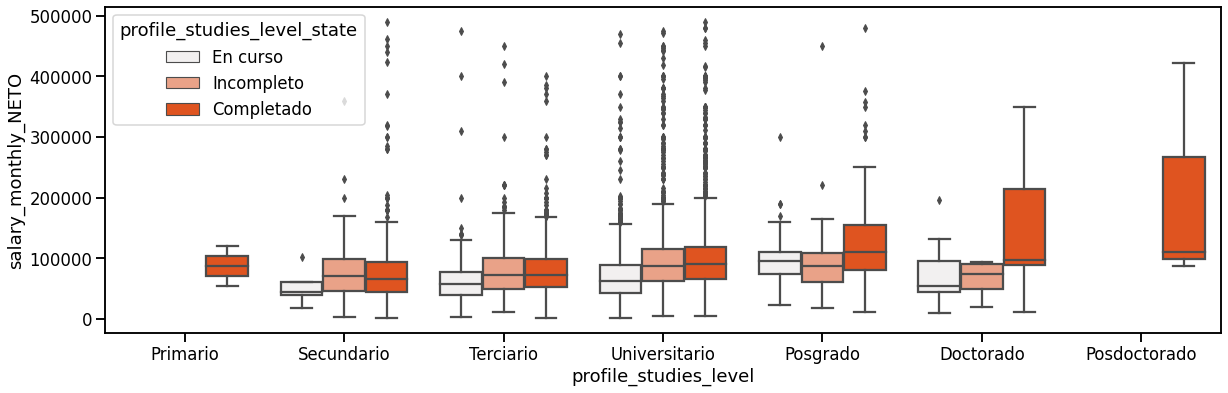

In [39]:
fig = plt.figure(figsize=(20,6))
seaborn.boxplot(data=df_copy, y=df_copy.salary_monthly_NETO,x='profile_studies_level', hue=df_copy.profile_studies_level_state, 
                color='orangered', order=education_order, hue_order=["En curso", "Incompleto", "Completado"] )
#fig, axes = plt.subplots(1, 2)
#seaborn.boxplot(data=cant_univers_terminado, x='salary_monthly_NETO', y='profile_studies_level',
#                color='orangered', order=education_order,ax=axes[0])
#seaborn.boxplot(data=cant_univ_no_termin, x='salary_monthly_NETO', y='profile_studies_level',
#                color='orangered', order=education_order,ax=axes[1])
plt.ticklabel_format(style='plain', axis='y')

Hago un zoom in en universitarios, eliminado de mi analisis datos muy por encima de la media que me indica el boxplot. Esto afectara los datos en la categoria 'Postdoctorado', pero ya que alguien consiga un postdoctorado es una rareza en si

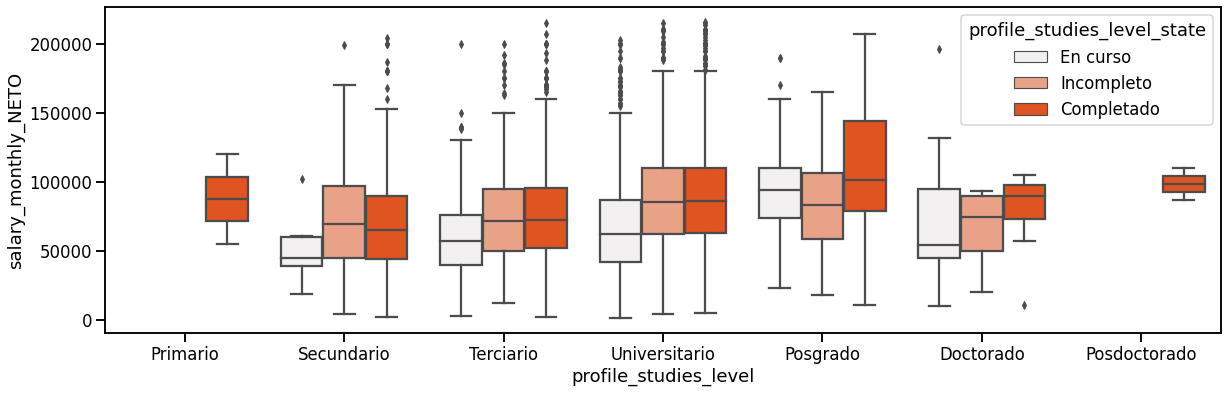

In [40]:
df_uni=df_copy.copy()
quantile_filter_uni= (df_uni.salary_monthly_NETO < df_uni.salary_monthly_NETO.quantile(0.96))
#df_copy.salary_monthly_NETO, df_copy.salary_monthly_NETO.median()

df_uni=df_uni[quantile_filter_uni]
fig = plt.figure(figsize=(20,6))
seaborn.boxplot(data=df_uni, y=df_uni.salary_monthly_NETO,x='profile_studies_level', hue=df_uni.profile_studies_level_state, 
                color='orangered', order=education_order, hue_order=["En curso", "Incompleto", "Completado"] )
plt.ticklabel_format(style='plain', axis='y')

Como se puede ver en este boxplot separado por estado de estudios, las personas que tienen un titulo universitario en adelante ganan mas en general que los que no. Pero la diferencia en salario neto entre tener un titulo universitario completo y uno incompleto es muy pequeña.

Este comportamiento se puede explicar por el tipo de rubro y la oferta y demanda del mercado laboral actual: demostrar que unx probramadorx sabe resolverlo, ya que hay mas demanda de programadorxs que oferta. 

Los tiempos de la academa son mas lentos que los tiempos de desarrollo de la industria.



In [41]:
#calculo de las probabilidades
amount_more_then_media =len(df_copy[more_then_media]) 

amount_higher_education = len(df_copy[df_copy.profile_studies_level.isin(higher_education)])
#len(df_copy[condition_education].profile_studies_level)
#amount_more_then_media_and_studies=len(df_copy[
#                                          (df_copy[more_then_media]) & (df_copy[condition_education].profile_studies_level) )
#amount_more_then_media_and_studies=len(df_copy[condition_education].profile_studies_level)
#amount_more_then_media, amount_more_then_media_and_studies
#df_copy[df_copy.profile_studies_level in higher_education ]
#len(df_copy[df_copy.profile_studies_level.isin(higher_education)])
amount_higher_edu_and_salary_more_than_media=len(df_copy[(df_copy.salary_monthly_NETO > 84000) & (df_copy.profile_studies_level.isin(higher_education))])
#amount_more_then_media,amount_higher_edu_and_salary_more_than_media

prob_salary_more_then_media=amount_more_then_media/len(df_copy)#p_a
prob_salary_more_media_and_higher_education=amount_higher_edu_and_salary_more_than_media/len(df) #p_a_u_b
prob_higher_educ=amount_higher_education/len(df) #p_b
#prob_salary_more_then_media,prob_salary_more_media_and_higher_education

#pa debido a b es igual a
prob_a_debido_b = prob_salary_more_media_and_higher_education / prob_higher_educ
p_a_prod_b=prob_salary_more_then_media*prob_higher_educ

prob_a_debido_b ,p_a_prod_b


(0.47744721689059505, 0.30201788487662073)